Importing Libraries

In [10]:
import os   ##For DIRECTORY and File Operations
import numpy as np  
import random   ##For genrating Random Values for Augmentation
import matplotlib.pyplot as plt
from PIL import Image,ImageEnhance  ##Image Processing and Enhancement
from tensorflow.keras.preprocessing.image import load_img ##LoadingImages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from sklearn.utils import shuffle  ##For shuffling the data

In [7]:
## Directories for Training and Testing Data:
train_dir='T:\Lung Cancer (H&E Images)\dataset\Train'
test_dir='T:\Lung Cancer (H&E Images)\dataset\Test'

## Load and shuffle Data:
train_paths=[]
train_labels=[]

for label in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir,label)):
        train_paths.append(os.path.join(train_dir,label,image))
        train_labels.append(label)

train_paths,train_labels=shuffle(train_paths,train_labels)


test_paths=[]
test_labels=[]
for label in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir,label)):
        test_paths.append(os.path.join(test_dir,label,image))
        test_labels.append(label)

test_paths,test_labels=shuffle(test_paths,test_labels)


Data Visualization


[12, 28, 20, 38, 5, 2, 32, 27, 25, 22]


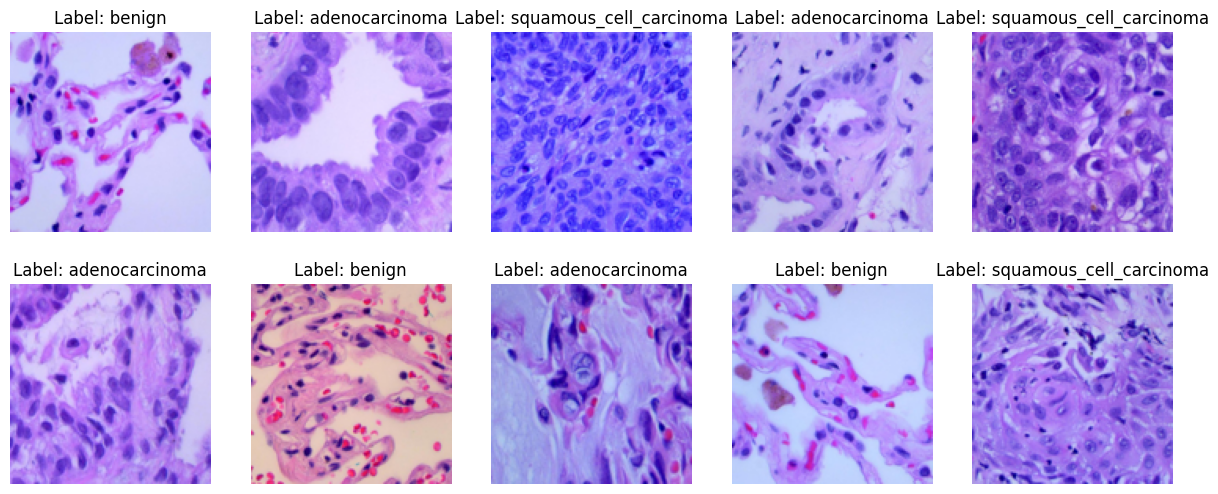

In [13]:
## Select random indices:
random_indices=random.sample(range(len(train_dir)),10)
print(random_indices)

## Create a figure to display images in rows:
fig, axes=plt.subplots(2,5,figsize=(15,6))
axes=axes.ravel()

##Loop through the random indices and display image:
for i,idx in enumerate(random_indices):
  img_path=train_paths[idx]
  img=Image.open(img_path)
  img=img.resize((128,128))
  axes[i].imshow(img,cmap='gray')
  axes[i].set_title(f"Label: {train_labels[idx]}")
  axes[i].axis("off")

Image Preprocessing